In [1]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

# Parte 1

In [2]:
oj = pd.read_csv('OJ.csv')
oj['purchaseNum'] = list(map(lambda x : 1 if x=="CH" else -1 , oj.Purchase))
test, train = train_test_split(oj,test_size = 0.50)
x_features = ['LoyalCH', 'PriceDiff']

In [3]:
blue = oj[oj.purchaseNum > 0]
red = oj[oj.purchaseNum < 0]

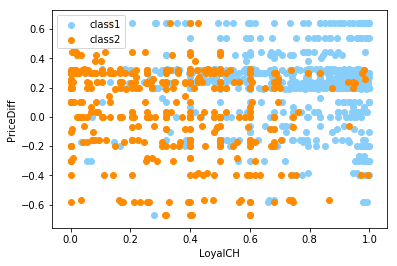

In [4]:
plt.scatter(blue.LoyalCH,blue.PriceDiff,c='lightskyblue',label = 'class1')
plt.scatter(red.LoyalCH,red.PriceDiff,c='darkorange',label = 'class2')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.legend()

## Sin sklearn, mejor recta para dividir las 2 clases

In [5]:
def params(b0,b1): 
    b2 = (1 - b0**2 - b1**2)**0.5
    return [b0, b1, b2]
def marg(betas):
    oj['M'] = (betas[0] + betas[1]*oj.LoyalCH  + betas[2]*oj.PriceDiff)*oj.purchaseNum

In [6]:
b0 = np.random.uniform(-5,5,100)
b1 = np.random.uniform(0,5,100)
betas = []
for i in range(len(b0)):
    for k in range(len(b1)):
        if((b0[i]**2 + b1[k]**2) <  1):
            betas.append(params(b0[i],b1[k]))

In [7]:
Ms = []
for i in range(len(betas)):
    marg(betas[i])
    Ms.append(min(oj.M))

In [8]:
maxM = max(np.array(Ms))
print (maxM)
betas = np.array(betas)
print (betas[Ms == maxM])

-0.447918187952946
[[-0.4530254   0.88694997  0.08993183]]


In [9]:
params = betas[Ms == maxM][0]
x1 = np.linspace(0,1,10)
y1 = (-x1*params[1]-params[0])/ params[2]

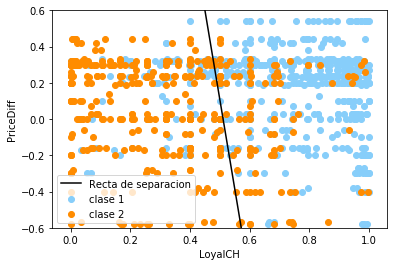

In [10]:
plt.plot(x1,y1,c='black',label = 'Recta de separacion')
plt.scatter(blue.LoyalCH,blue.PriceDiff,c='lightskyblue',label = 'clase 1')
plt.scatter(red.LoyalCH,red.PriceDiff,c='darkorange',label = 'clase 2')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.ylim(-0.6,0.6)
plt.legend()

In [11]:
def c1(x,y):
    r = params[1]*x + params[2]*y + params[0]
    if(r>0):
        return 'lightskyblue'
    else:
        return 'darkorange'

## Linear Support Vector Classifier de sklearn

In [12]:
from sklearn.svm import LinearSVC

In [13]:
svc = LinearSVC().fit(oj[x_features],oj.purchaseNum)
coef1 = svc.coef_[0][0]
coef2 = svc.coef_[0][1]
intercep = svc.intercept_[0]

In [14]:
x = np.linspace(0,1,10)
y = (-x*coef1-intercep)/ coef2
def c(x,y):
    r = coef1*x + coef2*y + intercep
    if(r>0):
        return 'lightskyblue'
    else:
        return 'darkorange'

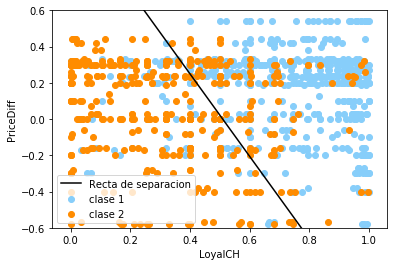

In [15]:
plt.plot(x,y,c='black',label = 'Recta de separacion')
plt.scatter(blue.LoyalCH,blue.PriceDiff,c='lightskyblue',label = 'clase 1')
plt.scatter(red.LoyalCH,red.PriceDiff,c='darkorange',label = 'clase 2')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.ylim(-0.6,0.6)
plt.legend()

## Figura 9.8

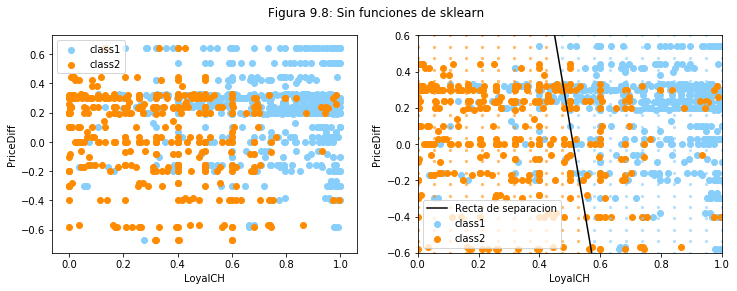

In [16]:
fig = plt.figure(figsize=(12,4))

fig.suptitle('Figura 9.8: Sin funciones de sklearn')

plt.subplot(121)
plt.scatter(blue.LoyalCH,blue.PriceDiff,c='lightskyblue',label = 'class1')
plt.scatter(red.LoyalCH,red.PriceDiff,c='darkorange',label = 'class2')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.legend()

plt.subplot(122)
plt.scatter(blue.LoyalCH,blue.PriceDiff,c='lightskyblue',label = 'class1')
plt.scatter(red.LoyalCH,red.PriceDiff,c='darkorange',label = 'class2')
plt.plot(x1,y1,c='black',label = 'Recta de separacion')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.ylim(-0.6,0.6)
plt.xlim(0,1)
plt.legend()


for xx in np.linspace(0,1,20):
    for yy in np.linspace(-0.6,0.6,20):
        plt.scatter(xx,yy,c=c1(xx,yy),alpha = 0.5,s=5)        


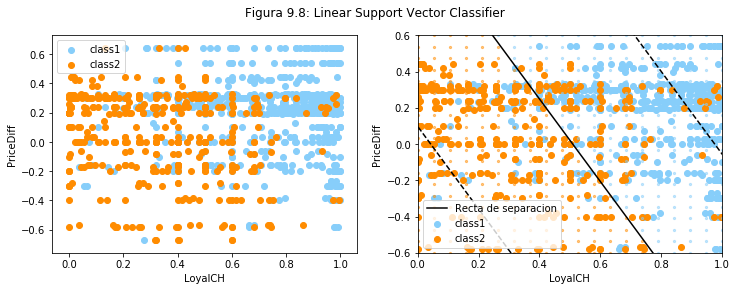

In [17]:
fig = plt.figure(figsize=(12,4))

fig.suptitle('Figura 9.8: Linear Support Vector Classifier ')

plt.subplot(121)
plt.scatter(blue.LoyalCH,blue.PriceDiff,c='lightskyblue',label = 'class1')
plt.scatter(red.LoyalCH,red.PriceDiff,c='darkorange',label = 'class2')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.legend()

plt.subplot(122)
plt.scatter(blue.LoyalCH,blue.PriceDiff,c='lightskyblue',label = 'class1')
plt.scatter(red.LoyalCH,red.PriceDiff,c='darkorange',label = 'class2')
plt.plot(x,y,c='black',label = 'Recta de separacion')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.ylim(-0.6,0.6)
plt.xlim(0,1)
plt.legend()


for xx in np.linspace(0,1,20):
    for yy in np.linspace(-0.6,0.6,20):
        plt.scatter(xx,yy,c=c(xx,yy),alpha = 0.5,s=5)
        
#margin  

a = -coef1 / coef2
xxx = np.linspace(-5, 5)
yyy = a * xxx - (intercep) / coef2

margin = 1 / np.sqrt(np.sum(svc.coef_ ** 2))
yy_down = yyy - np.sqrt(1 + a ** 2) * margin
yy_up = yyy + np.sqrt(1 + a ** 2) * margin
plt.plot(xxx,yy_down,c='black',linestyle='--')
plt.plot(xxx,yy_up  ,c='black',linestyle='--')

# Parte 2

## Con skelarn

In [18]:
import itertools

In [19]:
cars = pd.read_csv('Cars93.csv')
cars['mpgNum'] = list(map(lambda x : 1 if x>= np.median(cars['MPG.city']) else -1, cars['MPG.city']))
x_features = ['Fuel.tank.capacity', 'Horsepower', 'Length' , 'Rev.per.mile' , 'Turn.circle', 'Weight']

In [20]:
#Normalizacion
for x in x_features:
    cars[x] = (cars[x] - np.mean(cars[x]))/np.std(cars[x])

In [21]:
blue = cars[cars.mpgNum > 0]
red = cars[cars.mpgNum < 0]

In [22]:
svc = LinearSVC().fit(cars[x_features],cars.mpgNum)

In [23]:
x = np.linspace(0,1,10)
y = (-x*coef1-intercep)/ coef2
inter = svc.intercept_
def c(x,y,feat1,feat2):
    r = svc.coef_[0][x_features == feat1]*x + c2*svc.coef_[0][x_features == feat2] + inter
    if(r>0):
        return 'lightskyblue'
    else:
        return 'darkorange'

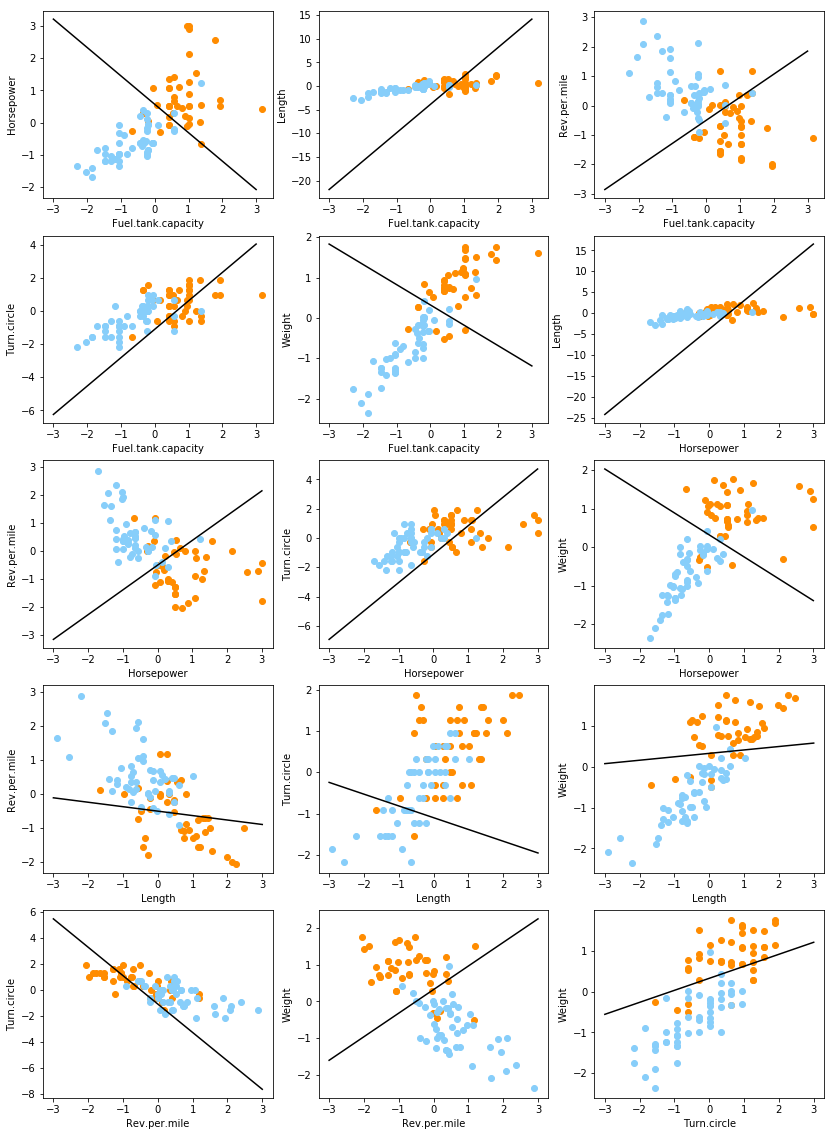

In [24]:
combs = list(itertools.combinations(x_features,r=2))
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(14, 20))

for ax, comb in zip(axs.flat, combs):

    ax.scatter(red[comb[0]],red[comb[1]],c='darkorange',label ='clase1')
    ax.scatter(blue[comb[0]],blue[comb[1]],c='lightskyblue',label='clase2')
    x = np.linspace(-3,3,10)
    y = (-x*svc.coef_[0][np.array(x_features) == comb[0]]-inter)/svc.coef_[0][np.array(x_features) == comb[1]]
    ax.plot(x,y,c='black',label = 'Recta de separacion')
    ax.set_xlabel(comb[0])
    ax.set_ylabel(comb[1])    

## Sin sklearn

In [25]:
def params(b0,b1,b2,b3,b4,b5): 
    b6 = (1 - b0**2 - b1**2 - b2**2 - b2**2 - b4**2 - b5**2)**0.5
    return [b0,b1,b2,b3,b4,b5,b6]
def marg(betas):
    cars['M'] = betas[0]
    for i in range(len(x_features)):
        cars['M'] += betas[i+1]*x_features[i]          
    cars['M'] = cars['M']*cars.mpgNum

In [ ]:
b0 = np.random.uniform(-5,5,100)
b1 = np.random.uniform(-5,5,100)
b2 = np.random.uniform(-5,5,100)
b3 = np.random.uniform(-5,5,100)
b4 = np.random.uniform(-5,5,100)
b5 = np.random.uniform(-5,5,100)
b6 = np.random.uniform(-5,5,100)
betas = []
for i in range(len(b0)):
    for k in range(len(b1)):
        for j in range(len(b2)):
            for l in range(len(b3)):
                for n in range(len(b4)):
                    for d in range(len(b5)):
                        if((b0[i]**2 + b1[k]**2 + b2[j]**2 + b3[l]**2 + b4[n]**2 + b5[d]**2) <  1):
                            betas.append(params(b0[i], b1[k], b2[j] , b3[l] , b4[n] , b5[d]))

In [ ]:
Ms = []
for i in range(len(betas)):
    marg(betas[i])
    Ms.append(min(cars.M))

In [ ]:
params = betas[Ms == maxM][0]

In [ ]:
combs = list(itertools.combinations(x_features,r=2))
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(14, 20))

for ax, comb in zip(axs.flat, combs):

    ax.scatter(red[comb[0]],red[comb[1]],c='darkorange',label ='clase1')
    ax.scatter(blue[comb[0]],blue[comb[1]],c='lightskyblue',label='clase2')
    x = np.linspace(-3,3,10)
    y = (-x*params[np.array(x_features) == comb[0]]-inter)/params[np.array(x_features) == comb[1]]
    ax.plot(x,y,c='black',label = 'Recta de separacion')
    ax.set_xlabel(comb[0])
    ax.set_ylabel(comb[1]) 